In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Load the specific Mall Customers file
df = pd.read_csv('Mall_Customers.csv')

# Display the first 5 rows
print("Shape of data:", df.shape)
df.head()

Shape of data: (200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


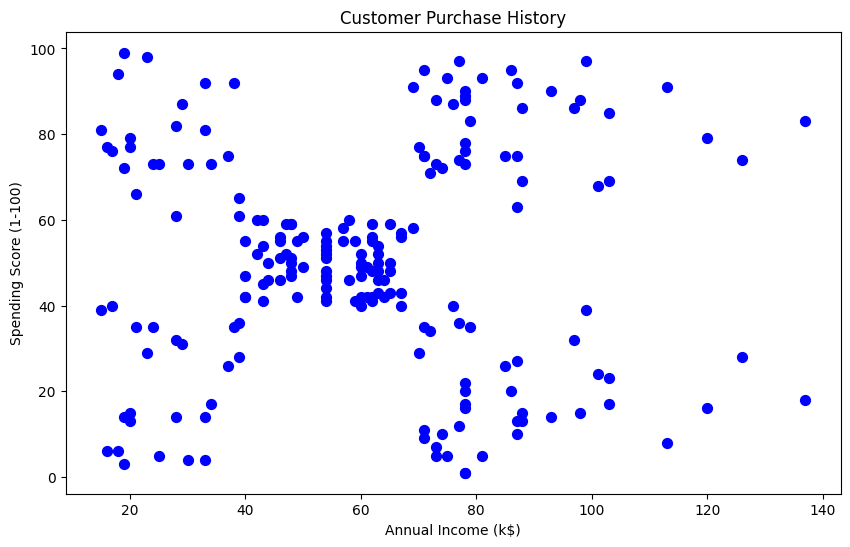

In [7]:
# 1. Select the Annual Income and Spending Score columns
# We use .iloc[:, [3, 4]] to get all rows, but only columns 3 and 4
X = df.iloc[:, [3, 4]].values

# 2. Plot the data points
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], s=50, c='blue')
plt.title('Customer Purchase History')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

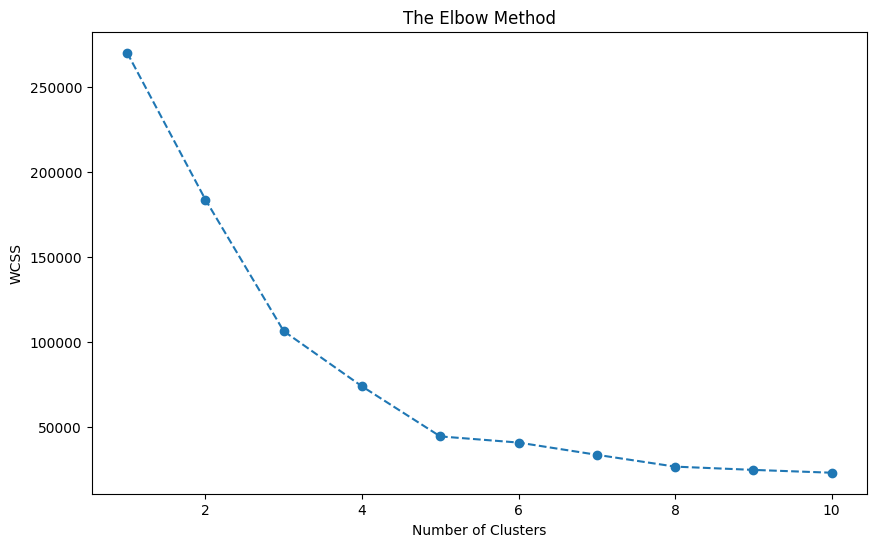

In [8]:
# 1. Create a list to store the WCSS values
wcss = []

# 2. Loop through 1 to 10 clusters to find the best fit
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# 3. Plot the Elbow Graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

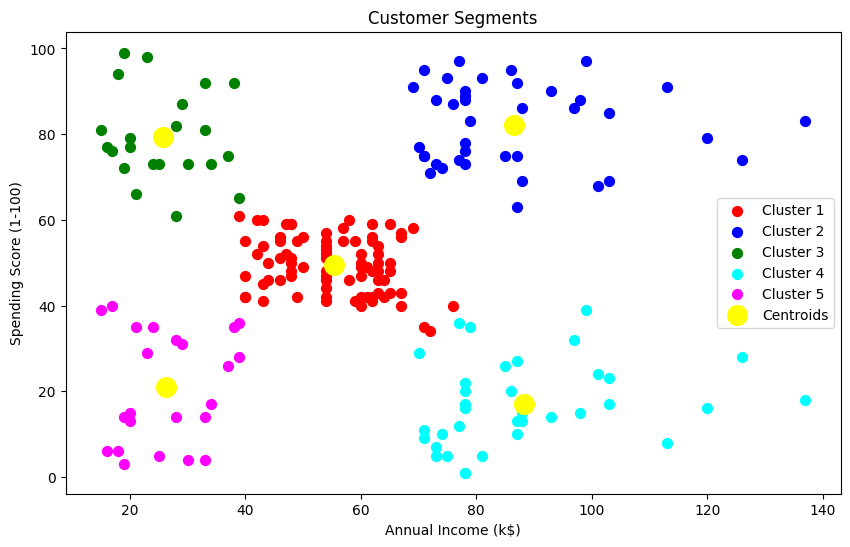

In [9]:
# 1. Train the K-Means model with 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# 2. Plot the final clusters
plt.figure(figsize=(10, 6))

# Plot each cluster with a different color
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=50, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=50, c='cyan', label='Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=50, c='magenta', label='Cluster 5')

# Plot the Centroids (the center of each cluster)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='yellow', label='Centroids')

plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [10]:
# Create a test customer: Income $90k, Spending Score 15
test_customer = [[90, 15]]

# Predict their cluster
prediction = kmeans.predict(test_customer)
print(f"A customer with $90k income and 15 spending score belongs to Cluster: {prediction[0]}")

A customer with $90k income and 15 spending score belongs to Cluster: 3
